In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
dataset = pd.read_csv("lutadores.csv")

In [4]:
df = pd.DataFrame(dataset)

In [5]:
df.head()


,id,nome_lutador,apelido,sexo,categoria,win,lose,draw,precisao_striking,sig_pe_str,...,media_knockdowns,tempo_medio,sig_head_str,sig_body_str,sig_leg_str,idade_lutador,altura_lutador,peso_lutador,link_corpo,link_rosto
0,1,nassourdine imavov,The Sniper,M,Peso-médio,16,4,0,0.56,0.70,...,0.19,863,4.81,1.41,0.81,29,75.0,185.0,https://ufc.com/images/styles/athlete_bio_full...,https://ufc.com/images/styles/event_results_at...
1,2,benoit saint denis,NaN,M,Peso-leve,14,3,0,0.56,0.59,...,0.88,453,2.08,1.06,0.52,29,71.0,156.0,https://ufc.com/images/styles/athlete_bio_full...,https://ufc.com/images/styles/event_results_at...
2,3,bolaji oki,Zulu Warrior,M,Peso-leve,10,2,0,0.45,0.95,...,0.41,545,1.89,0.51,0.16,29,70.0,155.5,https://ufc.com/images/styles/athlete_bio_full...,https://ufc.com/images/styles/event_results_at...
3,4,modestas bukauskas,The Baltic Gladiator,M,Peso meio-pesado,18,6,0,0.43,0.88,...,0.16,576,2.23,0.58,0.32,31,75.0,203.0,https://ufc.com/images/styles/athlete_bio_full...,https://ufc.com/images/styles/event_results_at...
4,5,fares ziam,Smile Killer,M,Peso-leve,17,4,0,0.52,0.70,...,0.12,801,2.23,0.67,0.52,27,73.0,156.0,https://ufc.com/images/styles/athlete_bio_full...,https://ufc.com/images/styles/event_results_at...


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2375 non-null   int64  
 1   nome_lutador           2375 non-null   object 
 2   apelido                1628 non-null   object 
 3   sexo                   2375 non-null   object 
 4   categoria              2375 non-null   object 
 5   win                    2375 non-null   int64  
 6   lose                   2375 non-null   int64  
 7   draw                   2375 non-null   int64  
 8   precisao_striking      2375 non-null   float64
 9   sig_pe_str             2375 non-null   float64
 10  sig_clinch_str         2375 non-null   float64
 11  sig_solo_str           2375 non-null   float64
 12  method_ko_tko          2375 non-null   float64
 13  method_dec             2375 non-null   float64
 14  method_fin             2375 non-null   float64
 15  golp

In [7]:
df = df.drop(columns=['id','apelido','link_corpo','link_rosto'])

In [8]:
df.head()

,nome_lutador,sexo,categoria,win,lose,draw,precisao_striking,sig_pe_str,sig_clinch_str,sig_solo_str,...,defesa_golpes_sig,defesa_quedas,media_knockdowns,tempo_medio,sig_head_str,sig_body_str,sig_leg_str,idade_lutador,altura_lutador,peso_lutador
0,nassourdine imavov,M,Peso-médio,16,4,0,0.56,0.70,0.17,0.13,...,0.59,0.79,0.19,863,4.81,1.41,0.81,29,75.0,185.0
1,benoit saint denis,M,Peso-leve,14,3,0,0.56,0.59,0.20,0.22,...,0.42,0.71,0.88,453,2.08,1.06,0.52,29,71.0,156.0
2,bolaji oki,M,Peso-leve,10,2,0,0.45,0.95,0.03,0.02,...,0.62,0.86,0.41,545,1.89,0.51,0.16,29,70.0,155.5
3,modestas bukauskas,M,Peso meio-pesado,18,6,0,0.43,0.88,0.10,0.02,...,0.51,0.78,0.16,576,2.23,0.58,0.32,31,75.0,203.0
4,fares ziam,M,Peso-leve,17,4,0,0.52,0.70,0.12,0.17,...,0.65,0.70,0.12,801,2.23,0.67,0.52,27,73.0,156.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome_lutador           2375 non-null   object 
 1   sexo                   2375 non-null   object 
 2   categoria              2375 non-null   object 
 3   win                    2375 non-null   int64  
 4   lose                   2375 non-null   int64  
 5   draw                   2375 non-null   int64  
 6   precisao_striking      2375 non-null   float64
 7   sig_pe_str             2375 non-null   float64
 8   sig_clinch_str         2375 non-null   float64
 9   sig_solo_str           2375 non-null   float64
 10  method_ko_tko          2375 non-null   float64
 11  method_dec             2375 non-null   float64
 12  method_fin             2375 non-null   float64
 13  golpes_sig_conectados  2375 non-null   float64
 14  golpes_sig_absorvidos  2375 non-null   float64
 15  medi

In [10]:
df = pd.get_dummies(df, columns=['sexo'], dtype=int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome_lutador           2375 non-null   object 
 1   categoria              2375 non-null   object 
 2   win                    2375 non-null   int64  
 3   lose                   2375 non-null   int64  
 4   draw                   2375 non-null   int64  
 5   precisao_striking      2375 non-null   float64
 6   sig_pe_str             2375 non-null   float64
 7   sig_clinch_str         2375 non-null   float64
 8   sig_solo_str           2375 non-null   float64
 9   method_ko_tko          2375 non-null   float64
 10  method_dec             2375 non-null   float64
 11  method_fin             2375 non-null   float64
 12  golpes_sig_conectados  2375 non-null   float64
 13  golpes_sig_absorvidos  2375 non-null   float64
 14  media_quedas           2375 non-null   float64
 15  medi

In [12]:
df.tail(10)

,nome_lutador,categoria,win,lose,draw,precisao_striking,sig_pe_str,sig_clinch_str,sig_solo_str,method_ko_tko,...,media_knockdowns,tempo_medio,sig_head_str,sig_body_str,sig_leg_str,idade_lutador,altura_lutador,peso_lutador,sexo_F,sexo_M
2365,guy mezger,Peso-médio,44,13,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,55,73.0,199.0,0,1
2366,mark kerr,Peso-pesado,13,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,54,72.0,250.0,0,1
2367,eric martin,Peso-pesado,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,1
2368,don frye,Peso-pesado,11,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,57,73.0,210.0,0,1
2369,mark schultz,Nan,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,1
2370,zane frazier,Peso-pesado,0,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,78.0,230.0,0,1
2371,trent jenkins,Peso-médio,0,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,74.0,185.0,0,1
2372,gerry harris,Nan,1,4,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,80.0,0.0,0,1
2373,patrick smith,Peso-pesado,4,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,59,74.0,225.0,0,1
2374,kevin rosier,Nan,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,1


In [13]:
df = df[(df['idade_lutador'] != 0) & (df['categoria'].notna())]
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome_lutador           2268 non-null   object 
 1   categoria              2268 non-null   object 
 2   win                    2268 non-null   int64  
 3   lose                   2268 non-null   int64  
 4   draw                   2268 non-null   int64  
 5   precisao_striking      2268 non-null   float64
 6   sig_pe_str             2268 non-null   float64
 7   sig_clinch_str         2268 non-null   float64
 8   sig_solo_str           2268 non-null   float64
 9   method_ko_tko          2268 non-null   float64
 10  method_dec             2268 non-null   float64
 11  method_fin             2268 non-null   float64
 12  golpes_sig_conectados  2268 non-null   float64
 13  golpes_sig_absorvidos  2268 non-null   float64
 14  media_quedas           2268 non-null   float64
 15  medi

C:\Users\joaov\AppData\Local\Temp\ipykernel_23944\4020635724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df['categoria'], order=df['categoria'].value_counts().index, palette='viridis')


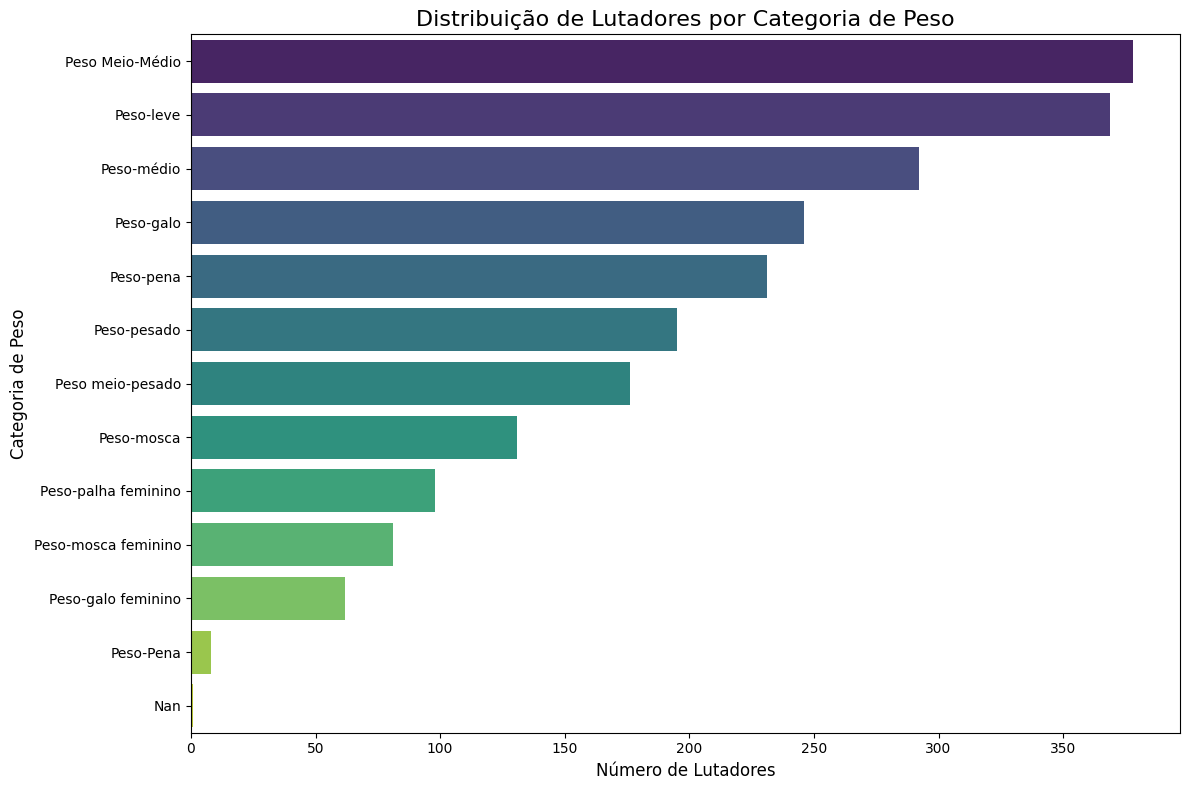

In [15]:
plt.figure(figsize=(12, 8))
sb.countplot(y=df['categoria'], order=df['categoria'].value_counts().index, palette='viridis')
plt.title('Distribuição de Lutadores por Categoria de Peso', fontsize=16)
plt.xlabel('Número de Lutadores', fontsize=12)
plt.ylabel('Categoria de Peso', fontsize=12)
plt.tight_layout()

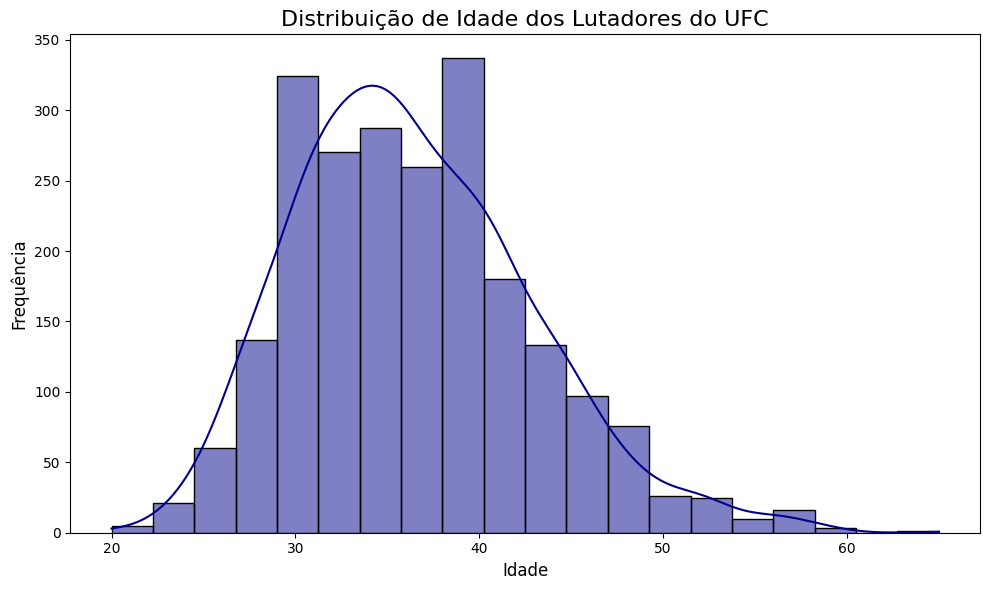

In [16]:
plt.figure(figsize=(10, 6))
sb.histplot(df['idade_lutador'], bins=20, kde=True, color='darkblue')
plt.title('Distribuição de Idade dos Lutadores do UFC', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()

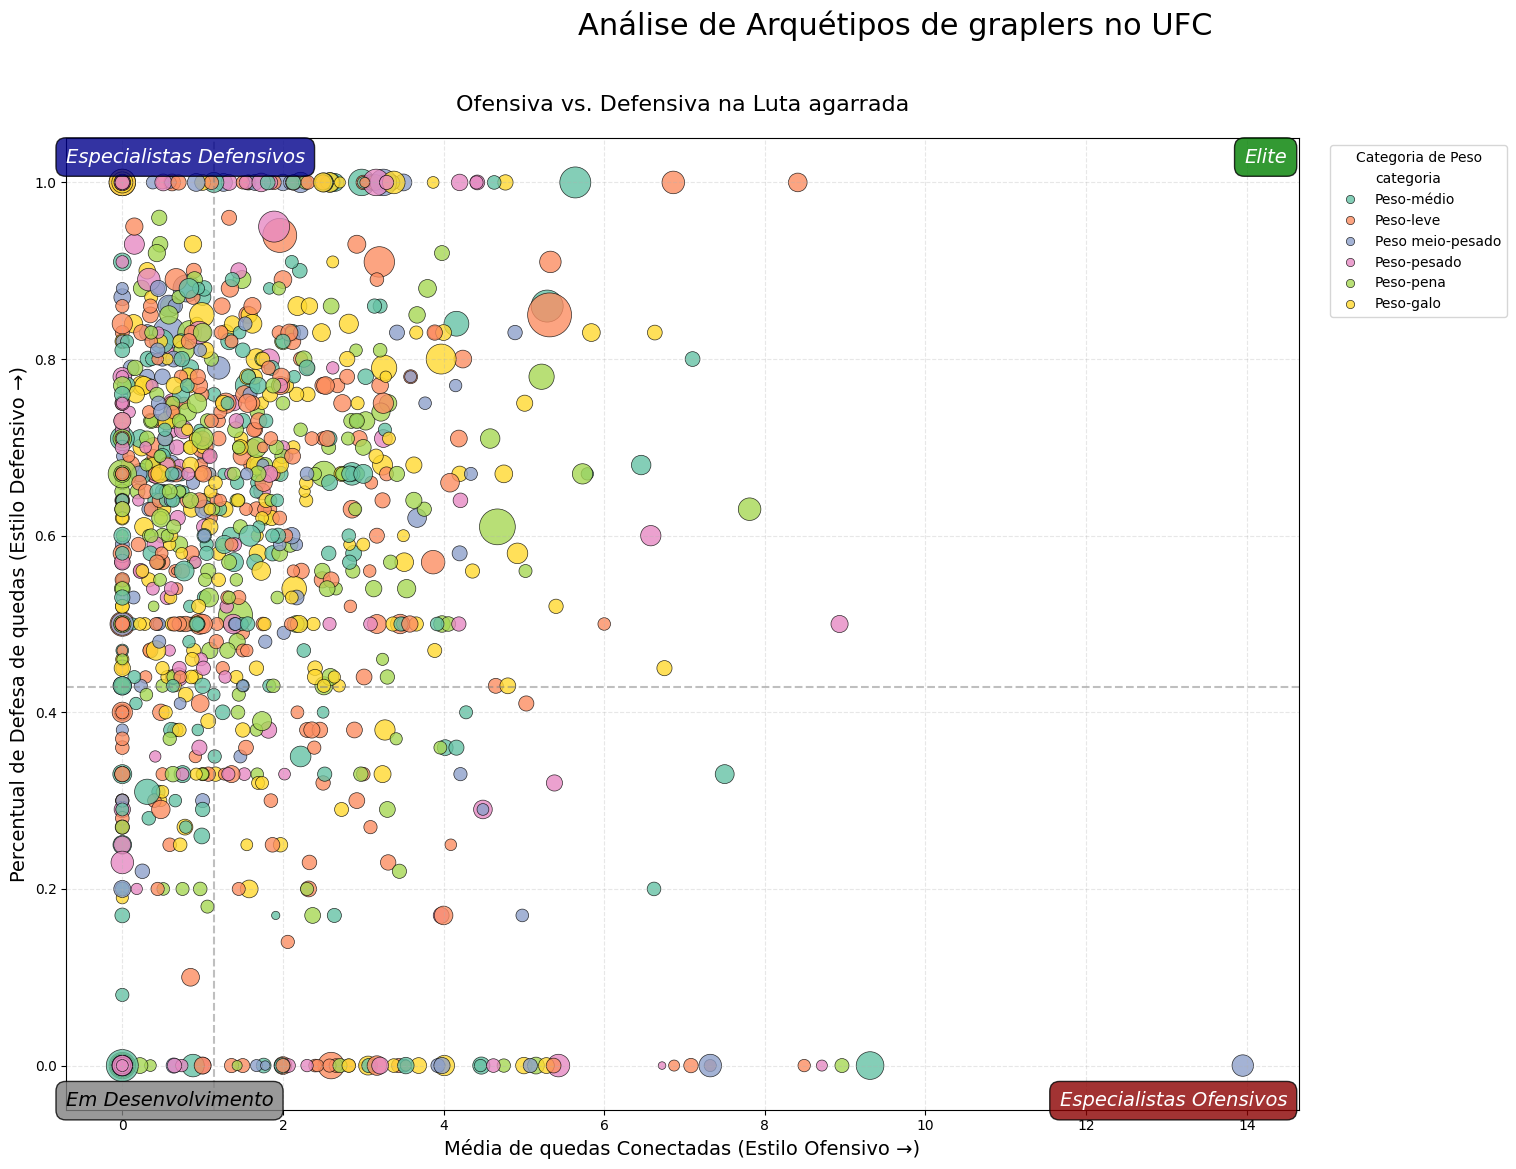

In [21]:

categorias_principais = ['Peso-pesado', 'Peso meio-pesado', 'Peso-médio', 'Peso meio-médio', 'Peso-leve', 'Peso-pena', 'Peso-galo']
df_filtrado = df[df['categoria'].isin(categorias_principais)].copy()
df_filtrado['relacao_vitoria_derrota'] = df_filtrado['win'] / (df_filtrado['lose'] + 1)

fig, ax = plt.subplots(figsize=(18, 12))

scatter = sb.scatterplot(
    data=df_filtrado,
    x='media_quedas',
    y='defesa_quedas',
    hue='categoria',
    size='relacao_vitoria_derrota',
    sizes=(30, 1000),
    palette='Set2',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

plt.suptitle('Análise de Arquétipos de graplers no UFC', fontsize=22, y=0.97)
plt.title('Ofensiva vs. Defensiva na Luta agarrada', fontsize=16, pad=20)
ax.set_xlabel('Média de quedas Conectadas (Estilo Ofensivo →)', fontsize=14)
ax.set_ylabel('Percentual de Defesa de quedas (Estilo Defensivo →)', fontsize=14)

avg_offense = df_filtrado['media_quedas'].mean()
avg_defense = df_filtrado['defesa_quedas'].mean()
ax.axvline(avg_offense, color='grey', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(avg_defense, color='grey', linestyle='--', linewidth=1.5, alpha=0.5)

plot_xlim = ax.get_xlim()
plot_ylim = ax.get_ylim()
ax.text(plot_xlim[1]*0.99, plot_ylim[1]*0.99, 'Elite', ha='right', va='top', fontsize=14, color='white', style='italic', bbox=dict(facecolor='green', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[0]*1.01, plot_ylim[1]*0.99, 'Especialistas Defensivos', ha='left', va='top', fontsize=14, color='white', style='italic', bbox=dict(facecolor='darkblue', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[1]*0.99, plot_ylim[0]*1.01, 'Especialistas Ofensivos', ha='right', va='bottom', fontsize=14, color='white', style='italic', bbox=dict(facecolor='darkred', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[0]*1.01, plot_ylim[0]*1.01, 'Em Desenvolvimento', ha='left', va='bottom', fontsize=14, color='black', style='italic', bbox=dict(facecolor='grey', alpha=0.8, boxstyle='round,pad=0.5'))


handles, labels = scatter.get_legend_handles_labels()

num_categorias_com_titulo = len(categorias_principais)
ax.legend(handles[:num_categorias_com_titulo], labels[:num_categorias_com_titulo], title='Categoria de Peso', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 0.95])

plt.grid(True, linestyle='--', alpha=0.3)

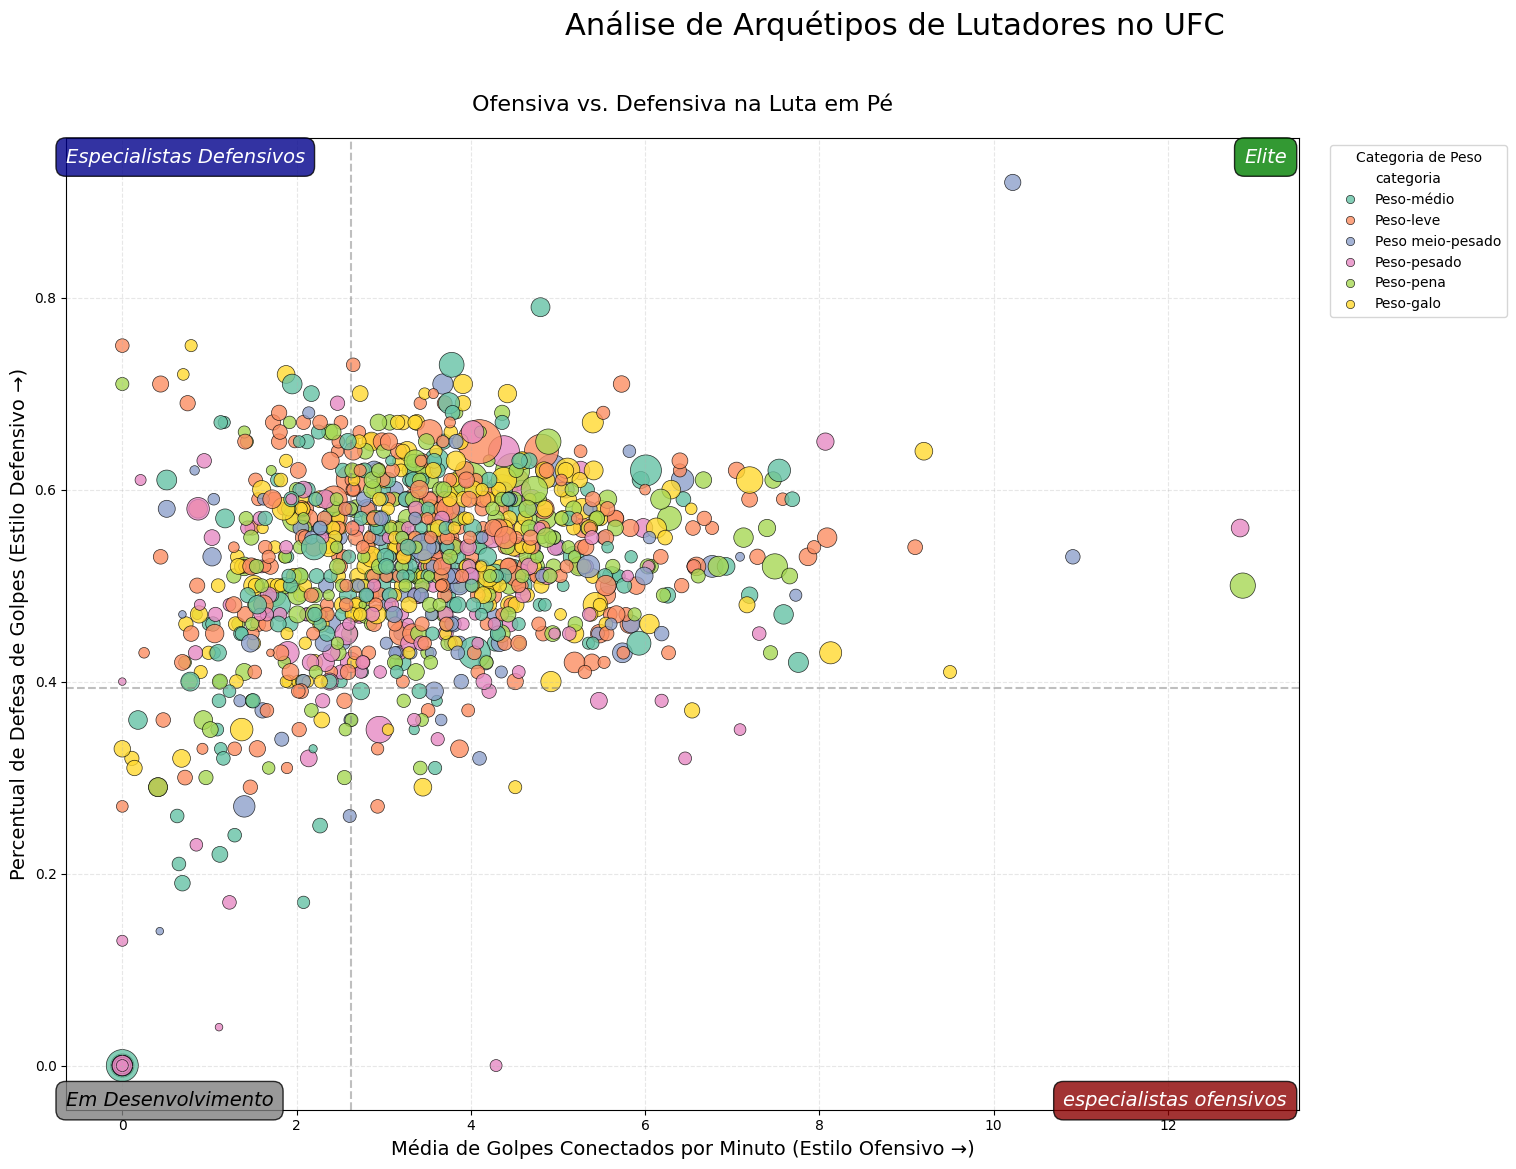

In [ ]:

categorias_principais = ['Peso-pesado', 'Peso meio-pesado', 'Peso-médio', 'Peso meio-médio', 'Peso-leve', 'Peso-pena', 'Peso-galo']
df_filtrado = df[df['categoria'].isin(categorias_principais)].copy()
df_filtrado['relacao_vitoria_derrota'] = df_filtrado['win'] / (df_filtrado['lose'] + 1).copy()

fig, ax = plt.subplots(figsize=(18, 12))

scatter = sb.scatterplot(
    data=df_filtrado,
    x='golpes_sig_conectados',
    y='defesa_golpes_sig',
    hue='categoria',
    size='relacao_vitoria_derrota',
    sizes=(30, 1000),
    palette='Set2',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

plt.suptitle('Análise de Arquétipos de strikers no UFC', fontsize=22, y=0.97)
plt.title('Ofensiva vs. Defensiva na Luta em Pé', fontsize=16, pad=20)
ax.set_xlabel('Média de Golpes Conectados por Minuto (Estilo Ofensivo →)', fontsize=14)
ax.set_ylabel('Percentual de Defesa de Golpes (Estilo Defensivo →)', fontsize=14)

avg_offense = df_filtrado['golpes_sig_conectados'].mean()
avg_defense = df_filtrado['defesa_golpes_sig'].mean()
ax.axvline(avg_offense, color='grey', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(avg_defense, color='grey', linestyle='--', linewidth=1.5, alpha=0.5)

plot_xlim = ax.get_xlim()
plot_ylim = ax.get_ylim()
ax.text(plot_xlim[1]*0.99, plot_ylim[1]*0.99, 'Elite', ha='right', va='top', fontsize=14, color='white', style='italic', bbox=dict(facecolor='green', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[0]*1.01, plot_ylim[1]*0.99, 'Especialistas Defensivos', ha='left', va='top', fontsize=14, color='white', style='italic', bbox=dict(facecolor='darkblue', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[1]*0.99, plot_ylim[0]*1.01, 'especialistas ofensivos', ha='right', va='bottom', fontsize=14, color='white', style='italic', bbox=dict(facecolor='darkred', alpha=0.8, boxstyle='round,pad=0.5'))
ax.text(plot_xlim[0]*1.01, plot_ylim[0]*1.01, 'Em Desenvolvimento', ha='left', va='bottom', fontsize=14, color='black', style='italic', bbox=dict(facecolor='grey', alpha=0.8, boxstyle='round,pad=0.5'))


handles, labels = scatter.get_legend_handles_labels()

num_categorias_com_titulo = len(categorias_principais)
ax.legend(handles[:num_categorias_com_titulo], labels[:num_categorias_com_titulo], title='Categoria de Peso', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 0.95])

plt.grid(True, linestyle='--', alpha=0.3)


--- Análise dos Clusters (Estatísticas Médias) ---
cluster                       0         1         2         3         4
precisao_striking      0.360466  0.448292  0.500109  0.471624  0.487516
golpes_sig_conectados  2.226201  3.246949  2.766436  4.972308  4.532422
golpes_sig_absorvidos  4.209391  3.097562  2.997891  5.410627  3.855217
defesa_golpes_sig      0.469785  0.578342  0.491491  0.508575  0.541429
media_quedas           0.841039  1.569453  2.926109  0.806296  0.931242
defesa_quedas          0.267384  0.690962  0.470036  0.664274  0.646957
media_knockdowns       0.094301  0.208939  0.167927  0.257863  1.244472
media_fin              0.303047  0.324229  1.405636  0.220114  0.312236
Centroides no espaço original:
   precisao_striking  golpes_sig_conectados  golpes_sig_absorvidos  \
0              0.360                  2.226                  4.209   
1              0.448                  3.247                  3.098   
2              0.500                  2.766                

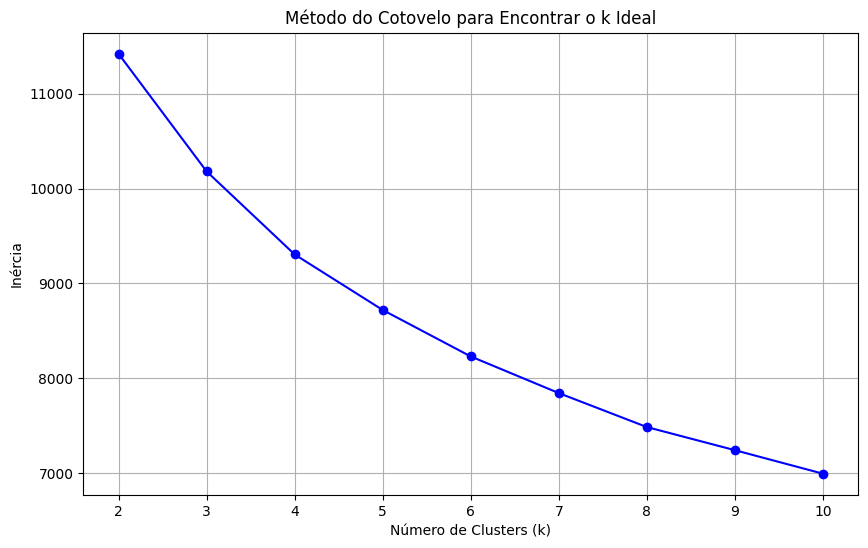

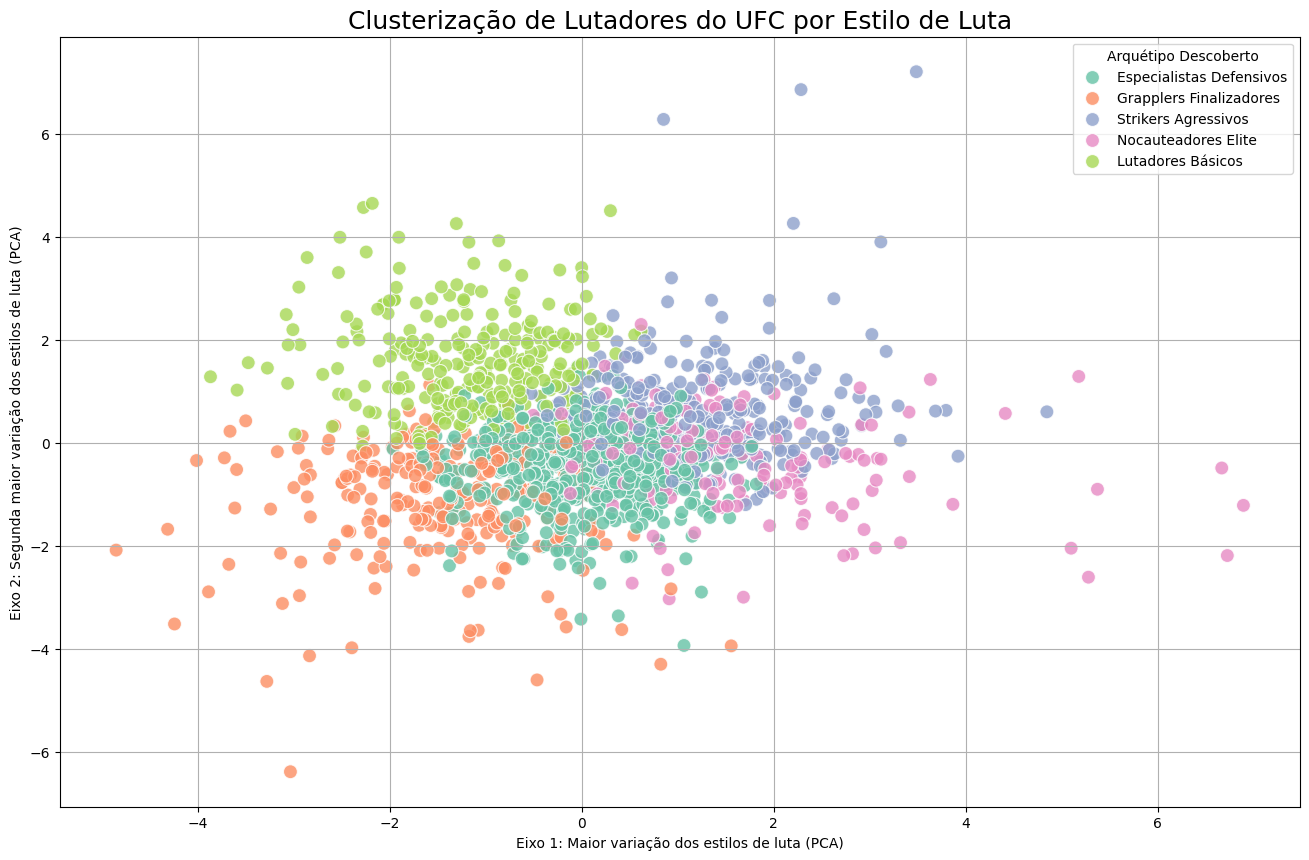

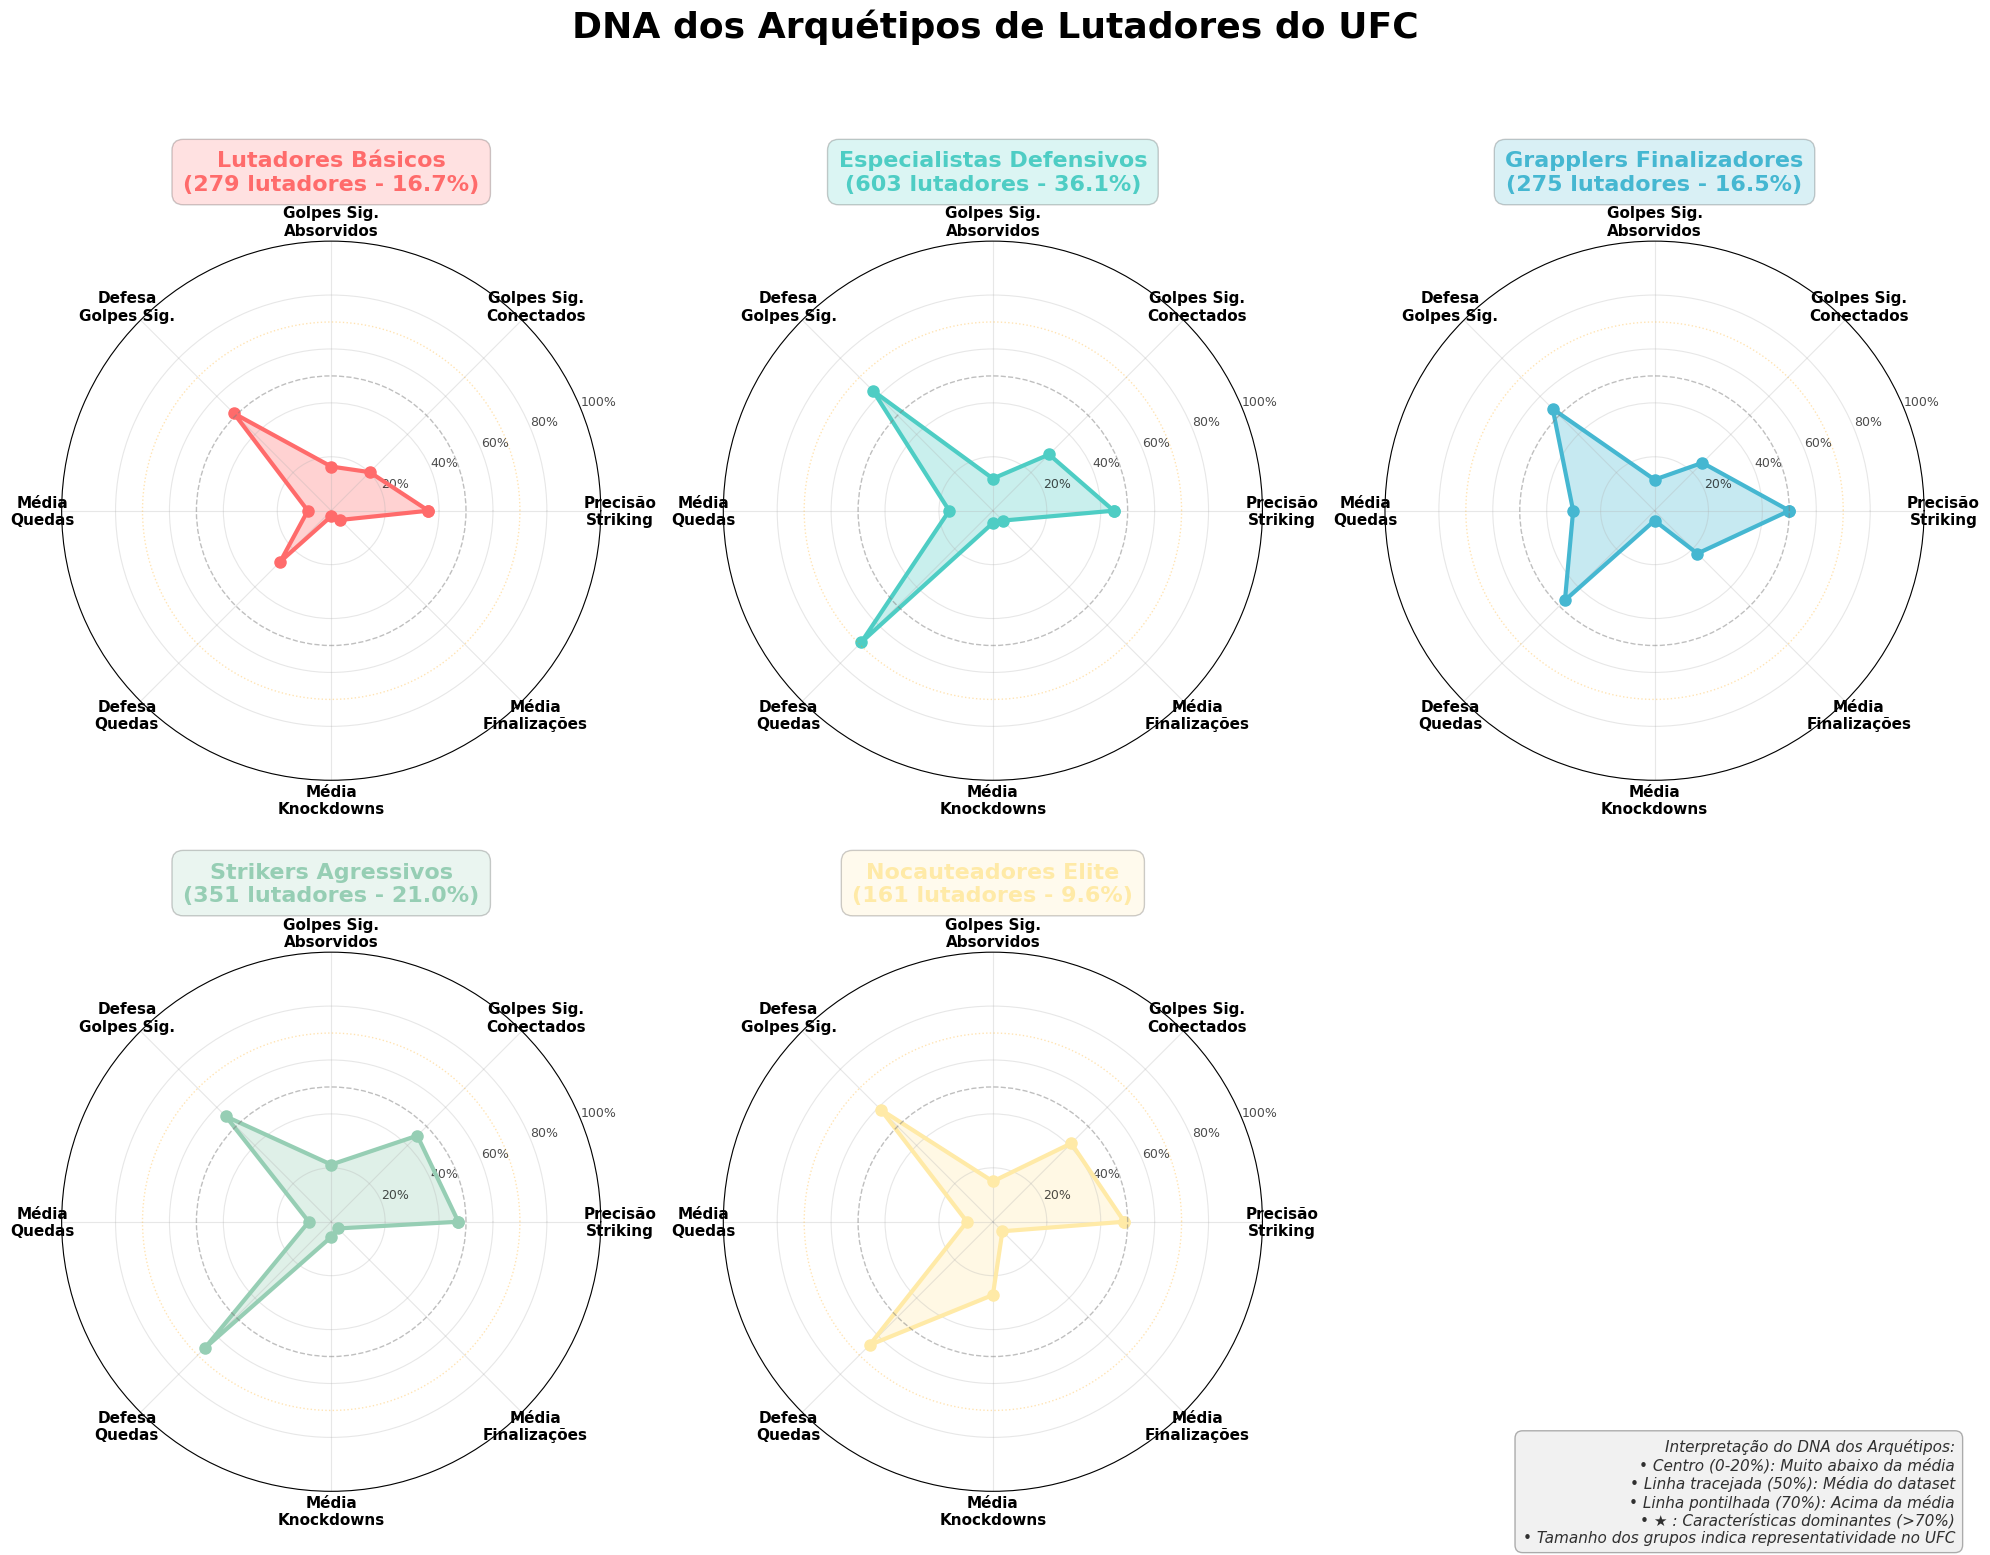

In [18]:

df_cluster = df[
    (df['win'] > 3) &
    (df['lose'] >= 1) & 
    (df['tempo_medio'] > 180)
].copy()
features = [
    'precisao_striking', 'golpes_sig_conectados', 'golpes_sig_absorvidos',
    'defesa_golpes_sig', 'media_quedas', 'defesa_quedas',
    'media_knockdowns', 'media_fin'
]
df_features = df_cluster[features].fillna(0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o k Ideal')
plt.grid(True)

# com base no grafico do cotovelo, o valor ideal de k é 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


df_cluster['cluster'] = clusters


cluster_analysis = df_cluster.groupby('cluster')[features].mean().T

print("\n--- Análise dos Clusters (Estatísticas Médias) ---")
print(cluster_analysis)

cluster_names = {
    0: 'Lutadores Básicos',  
    1: 'Especialistas Defensivos', 
    2: 'Grapplers Finalizadores',  
    3: 'Strikers Agressivos',  
    4: 'Nocauteadores Elite'  
}

df_cluster['estilo_de_luta'] = df_cluster['cluster'].map(cluster_names)


# Visualizar os clusters usando PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

plt.figure(figsize=(16, 10))
sb.scatterplot(
    data=df_cluster,
    x='pca1',
    y='pca2',
    hue='estilo_de_luta',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('Clusterização de Lutadores do UFC por Estilo de Luta', fontsize=18)
plt.xlabel('Eixo 1: Maior variação dos estilos de luta (PCA)')
plt.ylabel('Eixo 2: Segunda maior variação dos estilos de luta (PCA)')
plt.legend(title='Arquétipo Descoberto')
plt.grid(True)
centroids_scaled = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids_original, columns=features)
print("Centroides no espaço original:")
print(centroids_df.round(3))

cluster_names = {
    0: 'Lutadores Básicos',  
    1: 'Especialistas Defensivos', 
    2: 'Grapplers Finalizadores',  
    3: 'Strikers Agressivos',  
    4: 'Nocauteadores Elite'  
}

print(f"\nNomes dos clusters baseados nas características:")
for i, name in cluster_names.items():
    print(f"Cluster {i}: {name}")

# Agora normalizar usando min-max baseado nos dados originais
feature_mins = df_cluster[features].min().values
feature_maxs = df_cluster[features].max().values
feature_ranges = feature_maxs - feature_mins

centroids_normalized = np.zeros_like(centroids_original)
for i in range(len(features)):
    if feature_ranges[i] > 0:  
        centroids_normalized[:, i] = (centroids_original[:, i] - feature_mins[i]) / feature_ranges[i]
    else:
        centroids_normalized[:, i] = 0.5 
        
print(f"\nCaracterísticas principais:")
for i in range(optimal_k):
    print(f"\n{cluster_names[i]}:")
    for j, feature in enumerate(features):
        if centroids_normalized[i, j] > 0.6:
            print(f"  ✓ {feature}: {centroids_normalized[i, j]:.2f}")
        elif centroids_normalized[i, j] < 0.2:
            print(f"  ✗ {feature}: {centroids_normalized[i, j]:.2f}")

labels_radar = [
    'Precisão\nStriking',
    'Golpes Sig.\nConectados',
    'Golpes Sig.\nAbsorvidos',
    'Defesa\nGolpes Sig.',
    'Média\nQuedas',
    'Defesa\nQuedas',
    'Média\nKnockdowns',
    'Média\nFinalizações'
]

angles = np.linspace(0, 2 * np.pi, len(labels_radar), endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(figsize=(20, 16), nrows=2, ncols=3, subplot_kw=dict(polar=True))
fig.suptitle('DNA dos Arquétipos de Lutadores do UFC', fontsize=26, fontweight='bold', y=0.98)
axes_flat = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, ax in enumerate(axes_flat):
    if i < optimal_k:
        values = centroids_normalized[i].tolist()
        values += values[:1]
        
        ax.plot(angles, values, color=colors[i], linewidth=3, linestyle='solid', marker='o', markersize=8)
        ax.fill(angles, values, color=colors[i], alpha=0.3)
        
        
        ax.set_thetagrids(np.degrees(angles[:-1]), labels_radar, fontsize=11, fontweight='bold')
        ax.set_ylim(0, 1)
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=9, alpha=0.7)
        ax.grid(True, alpha=0.3)
   
        cluster_size = len(df_cluster[df_cluster['cluster'] == i])
        cluster_pct = cluster_size / len(df_cluster) * 100
        title_text = f"{cluster_names[i]}\n({cluster_size} lutadores - {cluster_pct:.1f}%)"
        
        ax.set_title(title_text, size=16, color=colors[i], y=1.08, fontweight='bold', 
                    bbox=dict(boxstyle="round,pad=0.5", facecolor=colors[i], alpha=0.2))
        
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
        ax.axhline(y=0.7, color='orange', linestyle=':', alpha=0.3, linewidth=1)
        
        for j, (angle, value) in enumerate(zip(angles[:-1], values[:-1])):
            if value > 0.7:
                ax.annotate('★', xy=(angle, value), xytext=(angle, value + 0.1),
                           fontsize=20, color=colors[i], ha='center', va='center',
                           fontweight='bold')
        
    else:
        ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])

legend_text = (
    'Interpretação do DNA dos Arquétipos:\n'
    '• Centro (0-20%): Muito abaixo da média\n'
    '• Linha tracejada (50%): Média do dataset\n'
    '• Linha pontilhada (70%): Acima da média\n'
    '• ★ : Características dominantes (>70%)\n'
    '• Tamanho dos grupos indica representatividade no UFC'
)

plt.figtext(0.98, 0.02, legend_text, fontsize=11, style='italic', alpha=0.8,
           bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.3),
           ha='right', va='bottom')

plt.show()